      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   LSTAT  MEDV  CAT. MEDV  
0   4.98  24.0          0  
1   9.14  21.6          0  
2   4.03  34.7          1  
3   2.94  33.4          1  
4   5.33  36.2          1  
Regression Equation: MEDV = -27.663 + (-0.276 * CRIM) + (4.699 * CHAS) + (8.101 * RM)
Predicted MEDV for given conditions: 20.92


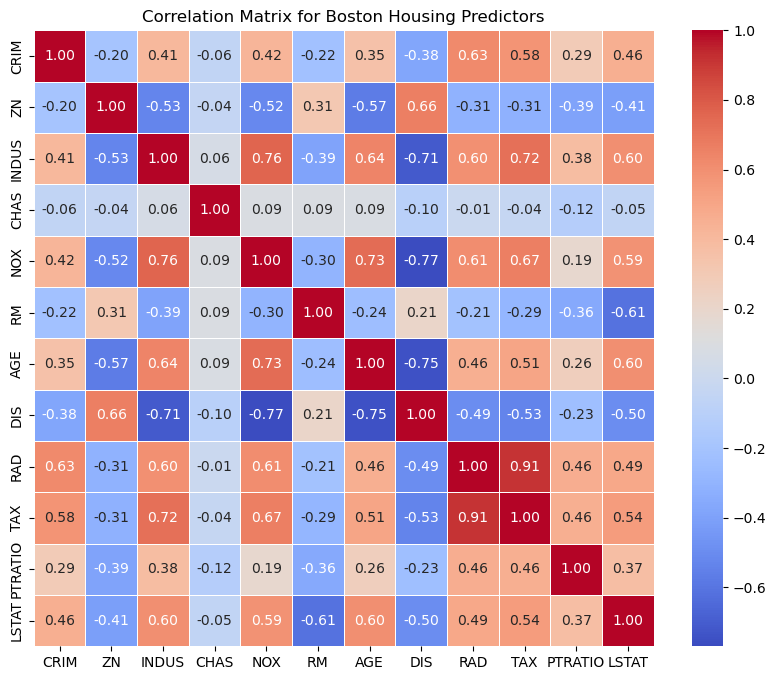

MAPE for reduced feature set: 17.92%


In [4]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

# Load the dataset
boston_data = pd.read_csv('BostonHousing.csv')

# Display the first few rows of the dataset
print(boston_data.head())

# (a) Partition the data into training and validation sets
# Separate predictors (X) and response (y)
X = boston_data.drop(['MEDV', 'CAT. MEDV'], axis=1)  # Drop response and categorical column
y = boston_data['MEDV']

# Split the data: 60% training, 40% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=42)

# (b) Fit a multiple linear regression model using CRIM, CHAS, and RM
# Select predictors for the subset model
X_train_subset = X_train[['CRIM', 'CHAS', 'RM']]
X_val_subset = X_val[['CRIM', 'CHAS', 'RM']]

# Fit the regression model
linear_model = LinearRegression()
linear_model.fit(X_train_subset, y_train)

# Coefficients of the regression model
coefficients = linear_model.coef_
intercept = linear_model.intercept_

# Display the regression equation
print("Regression Equation: MEDV = {:.3f} + ({:.3f} * CRIM) + ({:.3f} * CHAS) + ({:.3f} * RM)".format(
    intercept, coefficients[0], coefficients[1], coefficients[2]))

# (c) Predict MEDV for given conditions
# Create a DataFrame for the input with proper column names
tract_conditions_df = pd.DataFrame([[0.1, 0, 6]], columns=['CRIM', 'CHAS', 'RM'])

# Predict MEDV using the model
predicted_MEDV = linear_model.predict(tract_conditions_df)[0]
print("Predicted MEDV for given conditions: {:.2f}".format(predicted_MEDV))

# (d) Reduce the number of predictors
# i. Analyze multicollinearity
# Compute the correlation matrix for numerical predictors
correlation_matrix = X.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Boston Housing Predictors")
plt.show()

# Based on the correlation matrix, remove NOX and RAD
selected_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']
X_train_reduced = X_train[selected_features]
X_val_reduced = X_val[selected_features]

# ii. Refit the model with reduced predictors
linear_model_reduced = LinearRegression()
linear_model_reduced.fit(X_train_reduced, y_train)

# (e) Evaluate the final model
# Predict on the validation set
y_val_pred = linear_model_reduced.predict(X_val_reduced)

# Calculate MAPE for the validation set
mape = mean_absolute_percentage_error(y_val, y_val_pred)
print("MAPE for reduced feature set: {:.2f}%".format(mape * 100))